# Heart Disease Prediction

## Importing Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Loading Dataset

In [6]:
df = pd.read_csv("heart_2020_cleaned.csv")
print("Dataset loaded:", df.shape)
df.head()


Dataset loaded: (319795, 18)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


## Data Visualization

HeartDisease distribution:
 HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


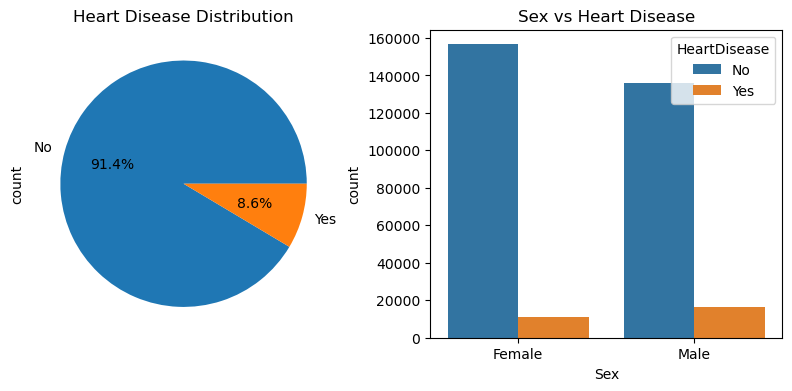

In [8]:
print("HeartDisease distribution:\n", df['HeartDisease'].value_counts())

# Set plot size to 10x4 inches
plt.figure(figsize=(10,4))
# Create 1st subplot (1 row, 2 columns, position 1)
plt.subplot(121)
df['HeartDisease'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Heart Disease Distribution')
# Create 2nd subplot (1 row, 2 columns, position 2)
plt.subplot(122)
sns.countplot(data=df, x='Sex', hue='HeartDisease')
plt.title('Sex vs Heart Disease')
plt.show()


## Data Cleaning

In [10]:
print("Before cleaning:", df.shape)
df = df.dropna()  # Remove ANY row with NaN
print("After dropna():", df.shape)
print("\nMissing values left:", df.isnull().sum().sum())


Before cleaning: (319795, 18)
After dropna(): (319795, 18)

Missing values left: 0


## Check Missing Values

Missing values per column:
0 total missing


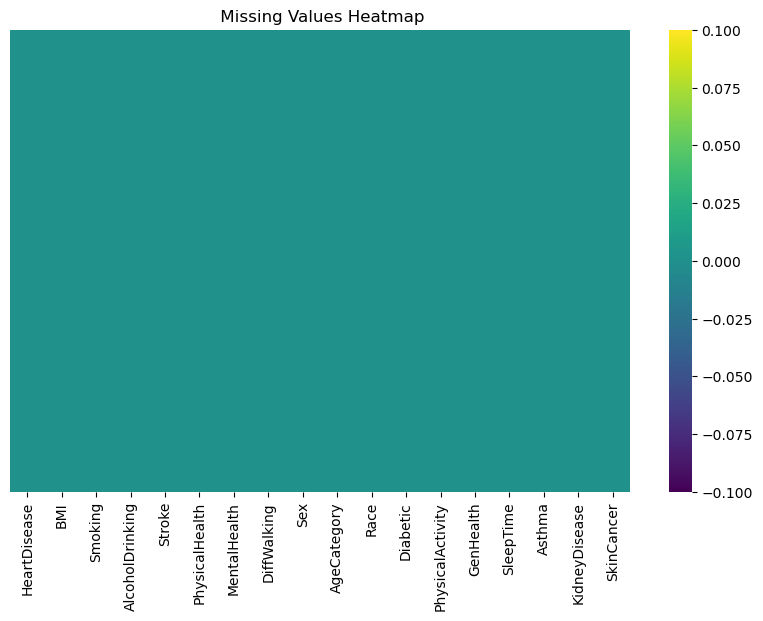

In [12]:
# Check for missing data 
print("Missing values per column:")
# Sum all missing values across dataset
print(df.isnull().sum().sum(), "total missing")

plt.figure(figsize=(10,6))  # Set plot size 10x6 inches
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')
plt.title(' Missing Values Heatmap')
plt.show()


## Check duplicates 

Total rows: 319795
Duplicate rows found: 18078


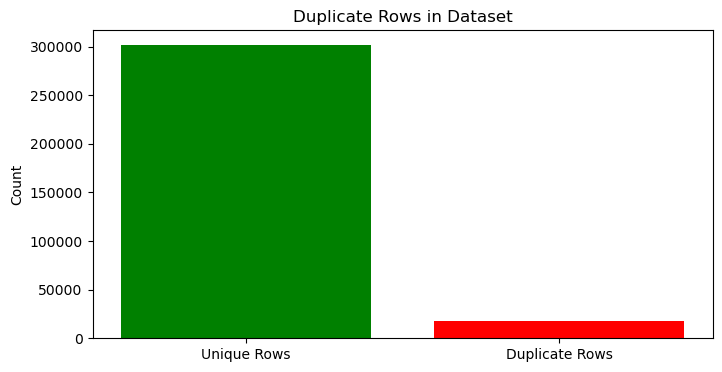

In [14]:
print("Total rows:", df.shape[0])

# Count duplicates
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
total_rows = df.shape[0]

print(f"Duplicate rows found: {num_duplicates}")

# Plot duplicates vs non-duplicates
plt.figure(figsize=(8,4))
plt.bar(['Unique Rows', 'Duplicate Rows'], [total_rows - num_duplicates, num_duplicates], color=['green', 'red'])
plt.title('Duplicate Rows in Dataset')
plt.ylabel('Count')
plt.show()

In [15]:
df = df.drop_duplicates()

duplicates = df.duplicated()
num_duplicates = duplicates.sum()

print(f"Duplicate rows found: {num_duplicates}")
print("Dataset shape after removing duplicates:", df.shape)


Duplicate rows found: 0
Dataset shape after removing duplicates: (301717, 18)


## Feature distribution

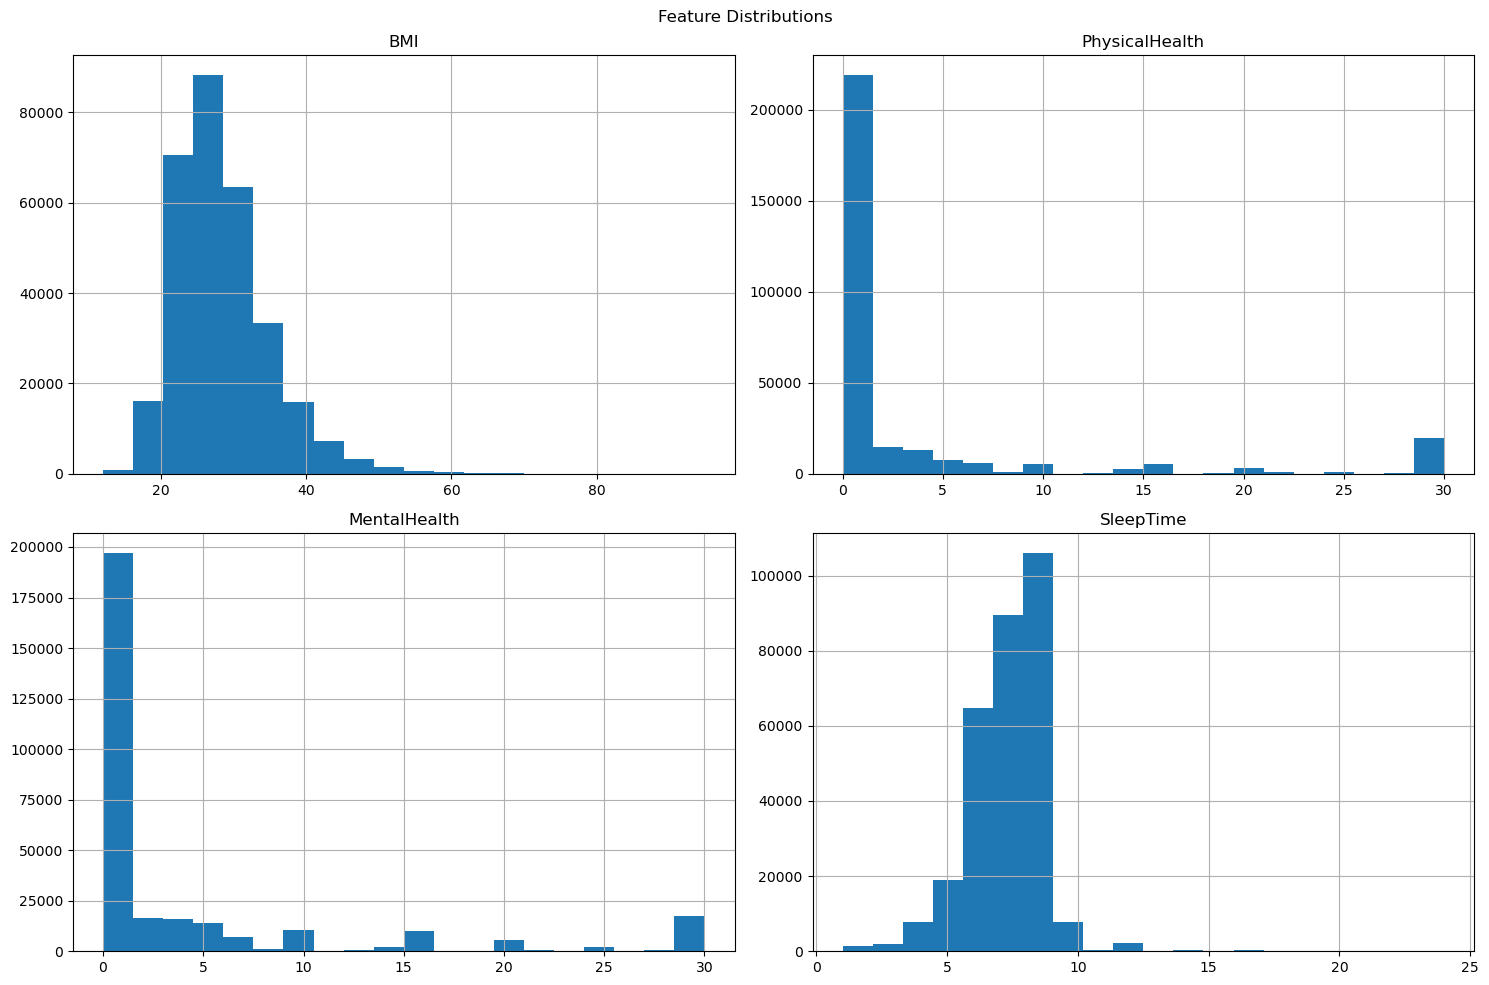

In [17]:
# Feature distributions
df.hist(figsize=(15,10), bins=20)   # bins=20 creates 20 bars per histogram
plt.suptitle('Feature Distributions')
plt.tight_layout()     # Adjust spacing between subplots
plt.show()

## Correlation heatmap

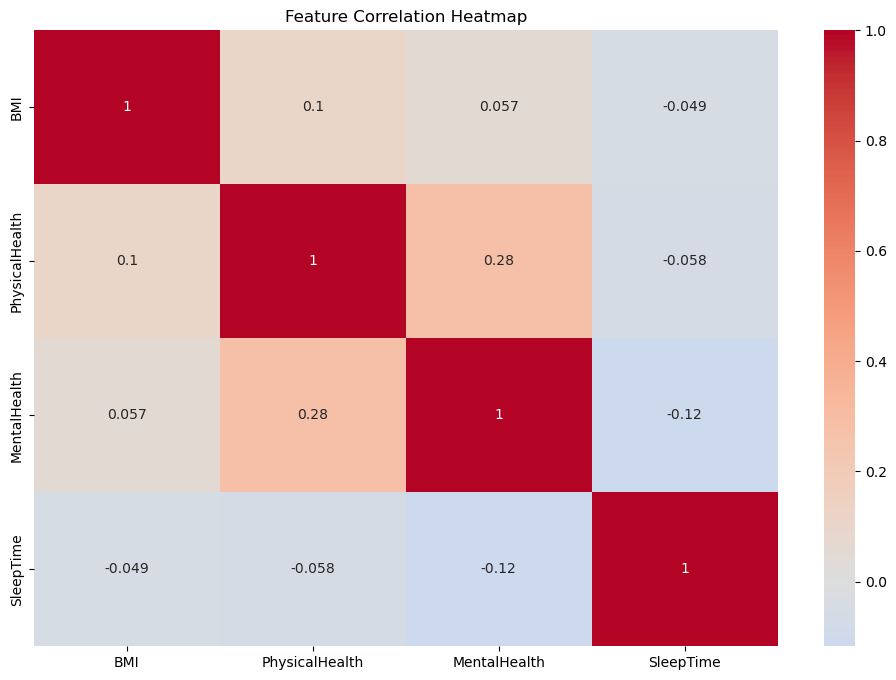

In [19]:
# Correlation heatmap
plt.figure(figsize=(12,8))   # Correlation plot size 12x8 inches
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Only numeric columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

## Encode Target Variable

In [21]:
df['HeartDisease'] = df['HeartDisease'].map({'Yes':1, 'No':0})  # Convert text to numbers
df = df.dropna(subset=['HeartDisease'])  # Remove rows where target encoding failed
print("Target encoded - Yes=1, No=0")
print(df['HeartDisease'].value_counts())
print("Shape:", df.shape)
print("NaN in target:", df['HeartDisease'].isnull().sum())

Target encoded - Yes=1, No=0
HeartDisease
0    274456
1     27261
Name: count, dtype: int64
Shape: (301717, 18)
NaN in target: 0


## Identify Categorical Columns

In [23]:
# Find ALL object columns except target
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'HeartDisease' in cat_cols:
    cat_cols.remove('HeartDisease')
print("Categorical columns to encode:", cat_cols)
print(f"Found {len(cat_cols)} categorical columns")


Categorical columns to encode: ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
Found 13 categorical columns


## Encode ALL Categorical Columns


In [25]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))
print("ALL categorical columns encoded!")
print("\nData types after encoding:")
print(df.dtypes.value_counts())


ALL categorical columns encoded!

Data types after encoding:
int32      13
int64       4
float64     1
Name: count, dtype: int64


## Final Data Check

In [27]:
print("Final dataset shape:", df.shape)
print("Any NaN left:", df.isnull().sum().sum())
print("All numeric columns:", len(df.select_dtypes(include=[np.number]).columns) == df.shape[1])
print("\nSample clean data:")
print(df.head())
print("\nTarget sample:", df['HeartDisease'].head())


Final dataset shape: (301717, 18)
Any NaN left: 0
All numeric columns: True

Sample clean data:
   HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0               3   
1             0  20.34        0                0       1               0   
2             0  26.58        1                0       0              20   
3             0  24.21        0                0       0               0   
4             0  23.71        0                0       0              28   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0            30            0    0            7     5         2   
1             0            0    0           12     5         0   
2            30            0    1            9     5         2   
3             0            0    0           11     5         0   
4             0            1    0            4     5         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma 

## Convert to NUMPY arrays

In [29]:
# CRITICAL FIX: Convert pandas to numpy arrays
X = df.drop('HeartDisease', axis=1).values.astype(float)  # .values = pandas to numpy
y = df['HeartDisease'].values.astype(float)               # .values = pandas to numpy

print("X shape (numpy):", X.shape)
print("y shape (numpy):", y.shape)
print("y unique values:", np.unique(y))
print("NaN in X:", np.isnan(X).sum())
print("NaN in y:", np.isnan(y).sum())

X shape (numpy): (301717, 17)
y shape (numpy): (301717,)
y unique values: [0. 1.]
NaN in X: 0
NaN in y: 0


## Train test split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTrain: {X_train.shape}, Test: {X_test.shape}")


Train: (241373, 17), Test: (60344, 17)


## Logistic Regression

LR: 0.910
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     54892
         1.0       0.52      0.09      0.16      5452

    accuracy                           0.91     60344
   macro avg       0.72      0.54      0.56     60344
weighted avg       0.88      0.91      0.88     60344



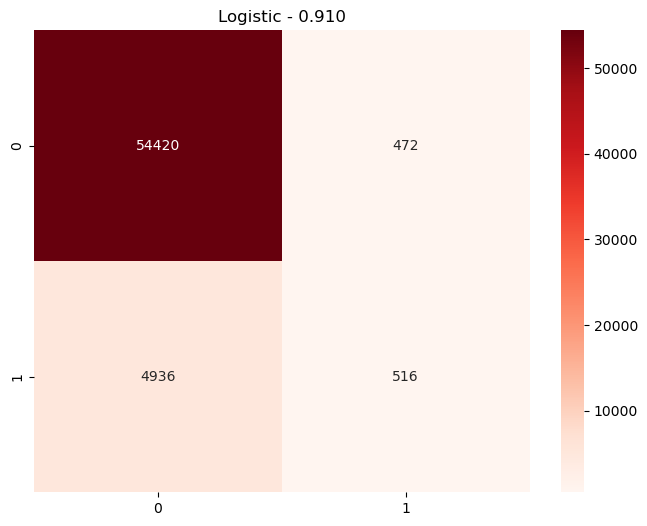

In [33]:
lr = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print(f"LR: {lr_acc:.3f}")
print(classification_report(y_test, lr_pred))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Reds')
plt.title(f'Logistic - {lr_acc:.3f}')
plt.show()


## Random Forest

Random Forest: 0.899
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     54892
         1.0       0.34      0.12      0.17      5452

    accuracy                           0.90     60344
   macro avg       0.63      0.55      0.56     60344
weighted avg       0.86      0.90      0.88     60344



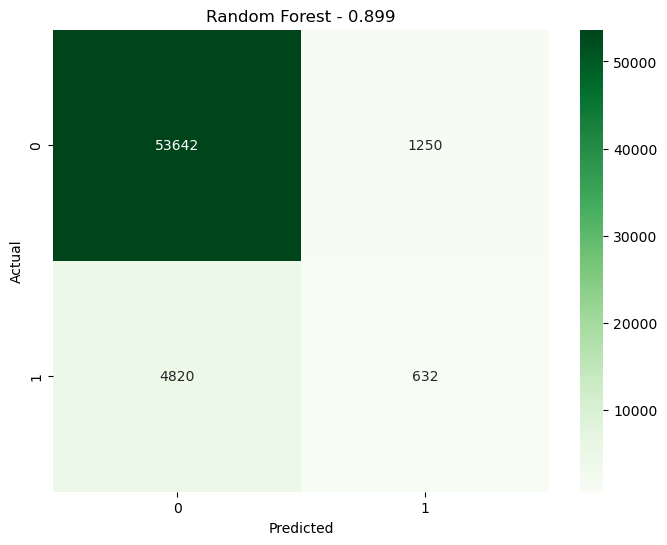

In [35]:
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest: {rf_acc:.3f}")
print(classification_report(y_test, rf_pred))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Greens')
plt.title(f'Random Forest - {rf_acc:.3f}')
plt.ylabel('Actual'); plt.xlabel('Predicted')
plt.show()


## Decision Tree

Decision Tree: 0.853
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     54892
         1.0       0.22      0.25      0.24      5452

    accuracy                           0.85     60344
   macro avg       0.57      0.58      0.58     60344
weighted avg       0.86      0.85      0.86     60344



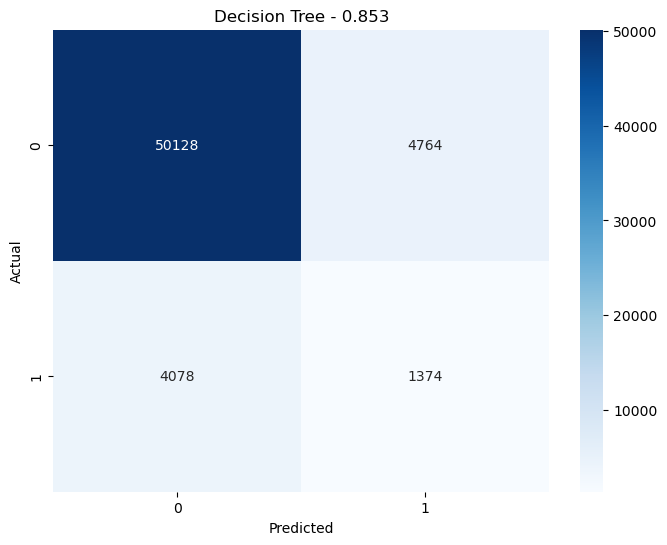

In [37]:
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print(f"Decision Tree: {dt_acc:.3f}")
print(classification_report(y_test, dt_pred))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f'Decision Tree - {dt_acc:.3f}')
plt.ylabel('Actual'); plt.xlabel('Predicted')
plt.show()


## Compare Models 

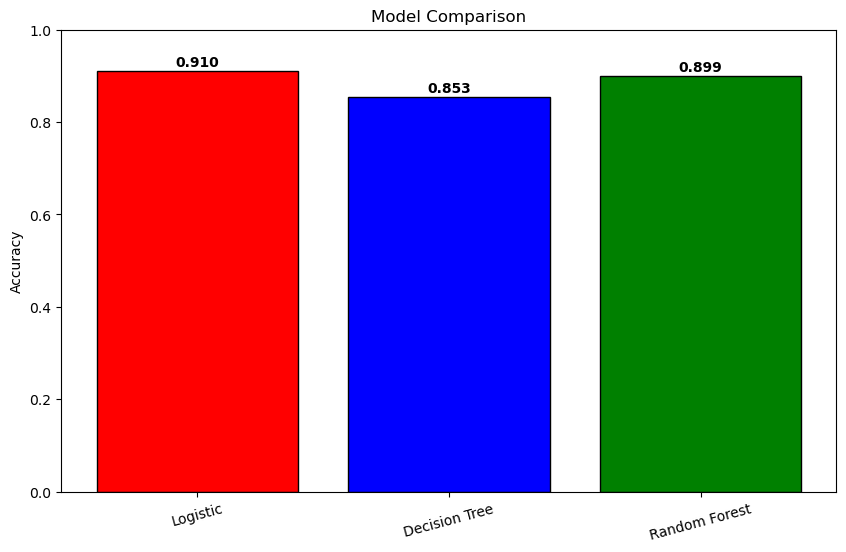

 BEST: Logistic


In [39]:
models = ['Logistic', 'Decision Tree', 'Random Forest']
accs = [lr_acc, dt_acc, rf_acc]

plt.figure(figsize=(10,6))
bars = plt.bar(models, accs, color=['red','blue','green'], edgecolor='black')
plt.ylim(0,1); plt.title('Model Comparison'); plt.ylabel('Accuracy')
for bar, acc in zip(bars, accs):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.01, f'{acc:.3f}', 
             ha='center', fontweight='bold')
plt.xticks(rotation=15)
plt.show()

print(f" BEST: {'Random Forest' if rf_acc > dt_acc and rf_acc > lr_acc else 'Logistic' if lr_acc > dt_acc else 'Decision Tree'}")


## Model for prediction 

In [41]:
# Make models global for user prediction
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_scaler = scaler
print("All models trained and ready for heart disease prediction!")
print("Variables saved: dt, rf, lr, scaler, X_test.shape[1]")


All models trained and ready for heart disease prediction!
Variables saved: dt, rf, lr, scaler, X_test.shape[1]


## best Model

In [43]:
models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf
}

accuracies = {
    "Logistic Regression": lr_acc,
    "Decision Tree": dt_acc,
    "Random Forest": rf_acc
}

best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]

print("Best model selected:", best_model_name)


Best model selected: Logistic Regression


In [44]:
print("HEART DISEASE RISK PREDICTION")

user_input = [
    int(input("Smoking (1=Yes, 0=No): ")),
    float(input("BMI: ")),
    int(input("Alcohol Drinking (1=Yes, 0=No): ")),
    int(input("Stroke History (1=Yes, 0=No): ")),
    int(input("Physical Health Days (0–30): ")),
    int(input("Mental Health Days (0–30): ")),
    int(input("Difficulty Walking (1=Yes, 0=No): ")),
    int(input("Sex (1=Male, 0=Female): ")),
    int(input("Age Category (numeric code): ")),
    int(input("Race (numeric code): ")), 
    int(input("Diabetic (1=Yes, 0=No): ")),
    int(input("Physical Activity (1=Yes, 0=No): ")),
    int(input("General Health (numeric code): ")),
    float(input("Sleep Time (hours): ")),
    int(input("Asthma (1=Yes, 0=No): ")),
    int(input("Kidney Disease (1=Yes, 0=No): ")),
    int(input("Skin Cancer (1=Yes, 0=No): "))
]

user_array = np.array(user_input).reshape(1, -1)

prediction = best_model.predict(user_array)[0]
probability = best_model.predict_proba(user_array)[0][1]

print("\nRESULT")
if prediction == 1:
    print(f"HIGH RISK of Heart Disease ({probability:.2%})")
else:
    print(f"LOW RISK of Heart Disease ({probability:.2%})")


HEART DISEASE RISK PREDICTION


Smoking (1=Yes, 0=No):  0
BMI:  25
Alcohol Drinking (1=Yes, 0=No):  0
Stroke History (1=Yes, 0=No):  0
Physical Health Days (0–30):  29
Mental Health Days (0–30):  29
Difficulty Walking (1=Yes, 0=No):  0
Sex (1=Male, 0=Female):  1
Age Category (numeric code):  21
Race (numeric code):  1
Diabetic (1=Yes, 0=No):  0
Physical Activity (1=Yes, 0=No):  1
General Health (numeric code):  99
Sleep Time (hours):  8
Asthma (1=Yes, 0=No):  0
Kidney Disease (1=Yes, 0=No):  0
Skin Cancer (1=Yes, 0=No):  0



RESULT
HIGH RISK of Heart Disease (99.98%)


## Predictions using all algorithms

In [46]:
lr_pred = lr.predict(user_array)[0]
lr_prob = lr.predict_proba(user_array)[0][1]

dt_pred = dt.predict(user_array)[0]
dt_prob = dt.predict_proba(user_array)[0][1]

rf_pred = rf.predict(user_array)[0]
rf_prob = rf.predict_proba(user_array)[0][1]


## Display individual results

In [48]:
print("\n" + "="*50)
print("HEART DISEASE RISK RESULTS")
print("="*50)

print(f"Logistic Regression: {'HIGH RISK' if lr_pred==1 else 'LOW RISK'} ({lr_prob:.2%})")
print(f"Decision Tree: {'HIGH RISK' if dt_pred==1 else 'LOW RISK'} ({dt_prob:.2%})")
print(f"Random Forest: {'HIGH RISK' if rf_pred==1 else 'LOW RISK'} ({rf_prob:.2%})")

print("="*50)



HEART DISEASE RISK RESULTS
Logistic Regression: HIGH RISK (99.98%)
Decision Tree: LOW RISK (0.00%)
Random Forest: LOW RISK (41.00%)


## Prepare Data for Comparison Plots

In [50]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
probabilities = [lr_prob, dt_prob, rf_prob]
predictions = [lr_pred, dt_pred, rf_pred]


## Risk Probability Comparison

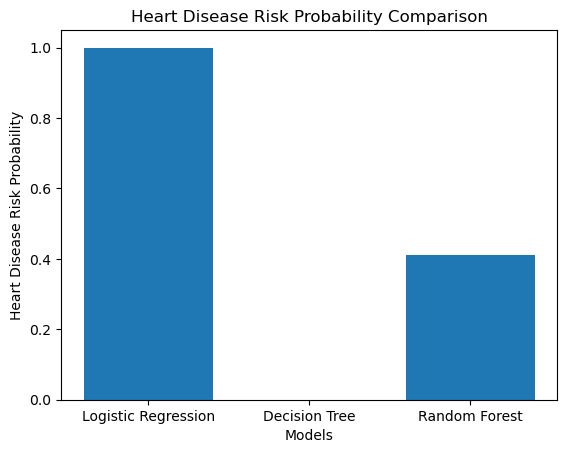

In [52]:
plt.figure()
plt.bar(models, probabilities)
plt.xlabel("Models")
plt.ylabel("Heart Disease Risk Probability")
plt.title("Heart Disease Risk Probability Comparison")
plt.show()


## Risk Classification Comparison

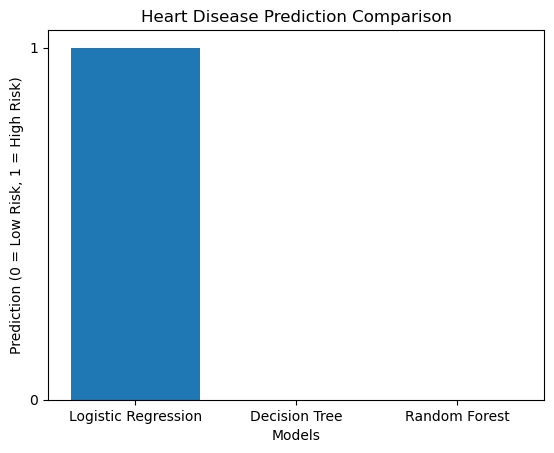

In [54]:
plt.figure()
plt.bar(models, predictions)
plt.xlabel("Models")
plt.ylabel("Prediction (0 = Low Risk, 1 = High Risk)")
plt.title("Heart Disease Prediction Comparison")
plt.yticks([0, 1])
plt.show()


## Pie Chart of Model Agreement

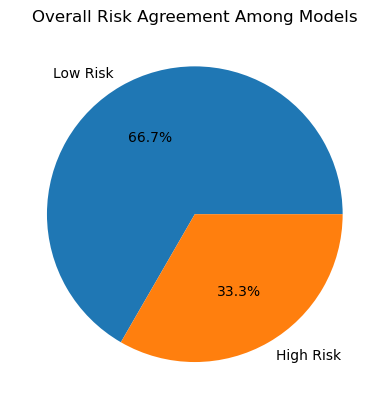

In [56]:
risk_labels = ['Low Risk', 'High Risk']
risk_counts = [predictions.count(0), predictions.count(1)]

plt.figure()
plt.pie(risk_counts, labels=risk_labels, autopct='%1.1f%%')
plt.title("Overall Risk Agreement Among Models")
plt.show()


## Probability Distribution

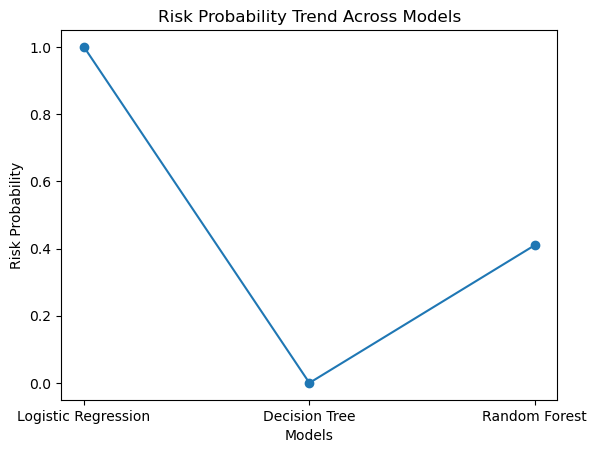

In [58]:
plt.figure()
plt.plot(models, probabilities, marker='o')
plt.xlabel("Models")
plt.ylabel("Risk Probability")
plt.title("Risk Probability Trend Across Models")
plt.show()
